In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/prueba/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url, sep=',')

df.head() #Método para ver los 1° registros

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#  Identificación y descripción de las variables (categóricas y numéricas).

✅ Variable categórica: **No se puede sumar o sacar promedio.**

Attrition: Rotación del empleado (Sí/No)

BusinessTravel: Frecuencia de viajes

Department: Área de trabajo

EducationField: Área de estudios

Gender: Género del empleado

JobRole: Cargo

MaritalStatus: Estado civil

OverTime: Si trabaja horas extra

✅ Variables Numéricas: **Se pueden hacer cálculos.**

Age: Edad del empleado

DailyRate, HourlyRate, MonthlyIncome, MonthlyRate: Ingresos

DistanceFromHome: Distancia desde casa

TotalWorkingYears, YearsAtCompany, YearsInCurrentRole: Años de experiencia o permanencia


In [6]:
#Medidas de tendencia central (Medio)
print("------------PROMEDIO---------------")
edad = df["Age"].mean()
print("Edad: ", edad)
pago = df["DailyRate"].mean()
print("Pago diario: ", pago)

print("------------MEDIANA---------------")
edad = df["Age"].median()
print("Edad: ", edad)
pago = df["DailyRate"].median()
print("Pago diario: ", pago)

print("------------MODA---------------")
edad = df["Age"].mode()
print("Edad: ", edad)
pago = df["DailyRate"].mode()
print("Pago diario: ", pago)

------------PROMEDIO---------------
Edad:  36.923809523809524
Pago diario:  802.4857142857143
------------MEDIANA---------------
Edad:  36.0
Pago diario:  802.0
------------MODA---------------
Edad:  0    35
Name: Age, dtype: int64
Pago diario:  0    691
Name: DailyRate, dtype: int64


# Medidas de tendencia central y dispersión

Las medidas de **tendencia central** son parte de la **Estadítica descriptiva**.

La edad promedio es de 36 años y el pago promedio diario de 802.

La distribución de estos datos es casi igual, lo datos estan bien distribuidos, sin muchos valores extremos.
La mayoria de los empleados tiene 36 años y gana 802, al parecer no hay valores extremos que alteren el promedio. Los sueldos se ven uniformes también.

In [32]:
#Medidas de dispersión
print("-----------------EDAD----------------------------")
joven = df.Age.min()
num_joven= df[df['Age'] == 18].shape[0]
print(f"Tenemos {num_joven} empleados con {joven} años. Son los empleados de menor edad en la empresa")

mayor = df.Age.max()
num_mayor= df[df['Age'] == 60].shape[0]
print(f"Tenemos {num_mayor} empleados con {mayor} años. Son los empleados de mayor edad en la empresa")

rango = df["Age"].max() - df['Age'].min()
print("El rango que tan separados de los extremos, en este caso la edad", rango, "años de difencia")

print("-----------------SUELDOS----------------------------")
sueldo = df.DailyRate.min()
print(f"El pago diario minimo es de {sueldo} dólares")
cant_sueldo = df[df['DailyRate'] == 102].shape[0]
print(f"Tenemos {cant_sueldo} empleados con un pago mínimo")

sueldo = df.DailyRate.max()
print(f"El pago diario máximo es de {sueldo} dólares")
cant_sueldo = df[df['DailyRate'] == 1499].shape[0]
print(f"Tenemos {cant_sueldo} empleados con un pago máximo")


-----------------EDAD----------------------------
Tenemos 8 empleados con 18 años. Son los empleados de menor edad en la empresa
Tenemos 5 empleados con 60 años. Son los empleados de mayor edad en la empresa
El rango que tan separados de los extremos, en este caso la edad 42 años de difencia
-----------------SUELDOS----------------------------
El pago diario minimo es de 102 dólares
Tenemos 1 empleados con un pago mínimo
El pago diario máximo es de 1499 dólares
Tenemos 1 empleados con un pago máximo


In [21]:
des_edad = df["Age"].std() #Que tan alejados entan lo años respecto a los 36 años
print("Desviación estandar de la edad ", des_edad)

des_sueldo = df["DailyRate"].std() #Que tan alejados entan lo años respecto a los 802 dólares
print("Desviación estandar de los sueldos ", des_sueldo)

Desviación estandar de la edad  9.135373489136734
Desviación estandar de los sueldos  403.50909994352827


In [23]:
q1 = df["Age"].quantile(0.25)
print(f"Primer cuartil {q1} años")
q3 = df["Age"].quantile(0.75)
print(f"Tercer cuartil {q3} años")
iqr = q3 - q1
print("Rango intercuartil de la edad ", iqr)


Primer cuartil 30.0 años
Tercer cuartil 43.0 años
Rango intercuartil de la edad  13.0


## Medidas de dispersión

En la edad mínima tenemos 18 años y la máxima 60 años con una difencia de 42 años, esto indica el **Rango**.

Con respecto a la **Desviasión estándar**, la mayoría de los empleados tiene una edad entre: 36.9 ± 9.13 → entre 27.8 y 46.0 años

Por último, vemos el **Rango intercuartil**, la mayoría de los empleados (el 50% central de los datos) tiene una edad entre 30 y 43 años.




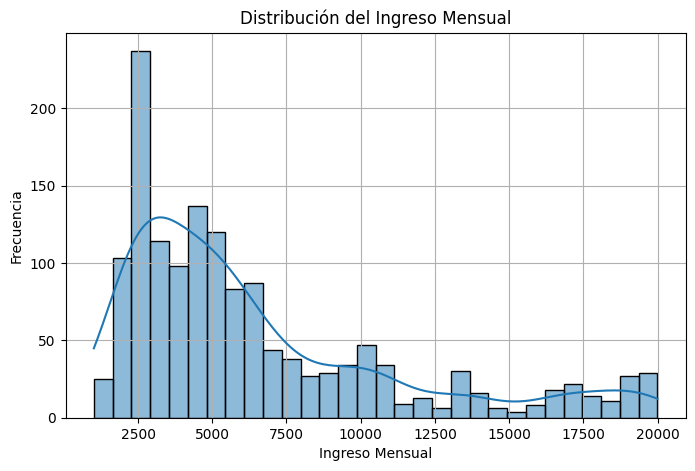

In [24]:
# Histograma con curva de densidad para MonthlyIncome
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyIncome'], kde=True, bins=30)
plt.title('Distribución del Ingreso Mensual')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# Análisis de distribución (incluyendo si hay sesgo o simetría).

La distribución es **asimétrica** a la derecha (**sesgo positivo**).

Hay muchos empleados con sueldos bajos o medios, y pocos con sueldos muy altos.

La media está por encima de la mediana, lo cual es típico en este tipo de **sesgo**.

En este caso, la mediana es un mejor resumen del sueldo “típico” que la media.

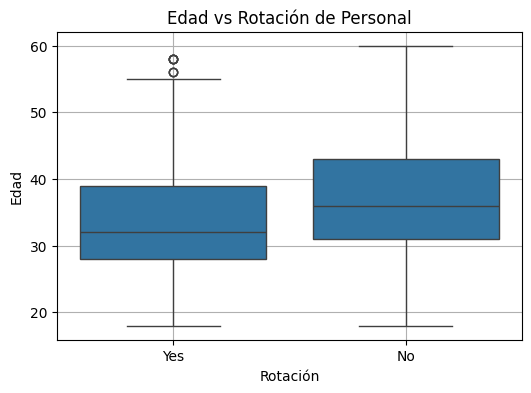

In [26]:
#  Boxplot (diagrama de caja): para analizar dispersión, asimetría y valores atípicos.
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Edad vs Rotación de Personal')
plt.xlabel('Rotación')
plt.ylabel('Edad')
plt.grid(True)
plt.show()


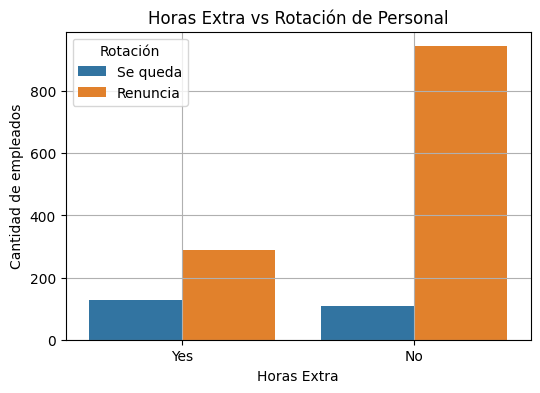

In [27]:
#Gráfico de barras agrupadas
plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Horas Extra vs Rotación de Personal')
plt.xlabel('Horas Extra')
plt.ylabel('Cantidad de empleados')
plt.legend(title='Rotación', labels=['Se queda', 'Renuncia'])
plt.grid(True)
plt.show()


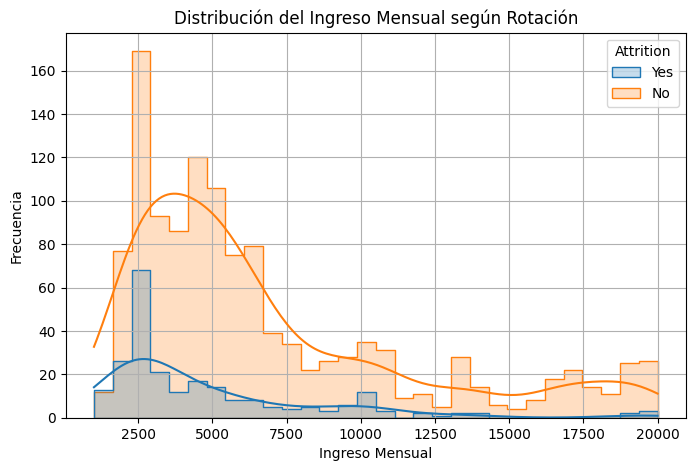

In [28]:
#Histogramas
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, bins=30, element='step')
plt.title('Distribución del Ingreso Mensual según Rotación')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [29]:
#Tablas de frecuencia
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


# Visualizaciones gráficas:
 **Boxplot ó diagrama de caja:** Los empleados más jóvenes tienden a renunciar más que los mayores.

**Gráfico de barras agrupadas:** La mayoría de los que hacen horas extra terminan renunciando.
Los que no hacen horas extra suelen quedarse.

**Histogramas:** Quienes renuncian suelen concentrarse en sueldos más bajos.
Quienes se quedan tienen ingresos más variados y hay más con sueldos altos.
Esto comparar visualmente cómo se distribuye el ingreso en ambos grupos.

**Tablas de frecuencia:** 237 personas renuncian y se quedan 1233

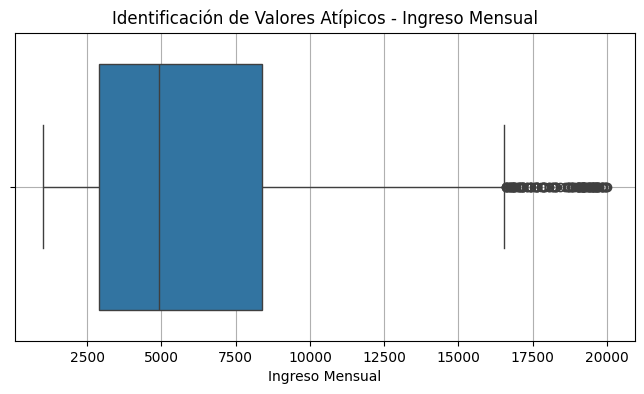

In [30]:
#Identificación de valores atípicos.
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Identificación de Valores Atípicos - Ingreso Mensual')
plt.xlabel('Ingreso Mensual')
plt.grid(True)
plt.show()

# Identificación de valores atípicos.

En este caso podemos identificar sueldo muy altos, que serían los valores atípicos u outliers.

Los puntos sueltos fuera de los bigotes son los outliers.

# Reflexiones o conclusiones preliminares sobre el comportamiento de los datos.

✨ Este dataset nos trae información de los empleados de una empresa. Tiene datos personales, departamento, ingreso mensual, horas extras y la rennuncia.

✨ Edad promedio de 36 años y pago diario de 802. La edad mínima es de 18 años y la máxima de 60 años. Por otra parte el pago diario va de 102 a 1499.
La mayoría de los empleados tiene una edad entre 27 y 46 años.

✨ Hay muchos empleados con sueldos bajos o medios, y pocos con sueldos muy altos.

✨Los empleados que más renuncia son:
Jóvenes
Los que hacen horas extras
Sueldos bajos

#Por último...

**Explorar qué factores podrían estar asociados a la rotación de personal (attrition)**

*   Edad: Más jóvenes
*   Ingreso mensual: Menor sueldo
*   Horas extras: A mayor horas extras más rotación
*   Estado civil: Soltero

**Describir el perfil de los empleados que tienden a quedarse o a abandonar la empresa.**

📉 Empleados que tienden a abandonar la empresa:
* Edad entre 18 y 30 años

* Ingreso mensual bajo

* Realizan horas extra

* Mayormente solteros

* Algunos con pocos años en la empresa

📈 Empleados que tienden a quedarse:
* Edad entre 35 y 50 años

* Sueldo medio o alto

* No trabajan horas extra

* Mayor proporción de casados

* Mayor antigüedad en el cargo o en la empresa